# Riddler Classic
### For this puzzle: https://fivethirtyeight.com/features/can-you-reach-the-beach/

In [1]:
#General imports for the math: 
import math
import scipy
from scipy import special
from collections import defaultdict 

#These are for plotting: 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#This func is for the defaultdict: 
def def_value(): 
    return 0

In [2]:
#This function takes a dictionary of parallel nodes and probs and returns a dictionary of the next level of parallel nodes&probs
def intermediate(int_dict):
    ans_dict = defaultdict(def_value)
    for entry in int_dict:         
        #print("entry: ", entry)
        pairs_init = math.floor(entry/2)
        #print('pairs_init: ', pairs_init)
        myremainder = entry % 2
        for i in range(pairs_init+1):
            #print('i: ', i)
            #print("next: ", pairs_init*2 + myremainder + i)
            ans_dict[pairs_init*2 + myremainder + i] += (.5)**pairs_init * scipy.special.comb(pairs_init, i) * int_dict[entry]
    return ans_dict

In [3]:
#This func takes a layer of a tree. i.e. a dict of possible outcomes and possibilities
#And returns their weighted average as a simple vector
#Readily adapted to other expected value contexts or problems

def exp_val(fin_dict):
    my_ex = 0
    for entry in fin_dict:
        my_ex += entry * fin_dict[entry]
    return my_ex

In [4]:
#The arch-function
#That sums two numbers x and y
#And returns the expected value after N days

def nematodes(x, y, n=1):
    sum_init = (x+y)
    first_dict = defaultdict(def_value)
    first_dict[x+y] = 1
    mydicts = [first_dict]
    for i in range(n):
        nextone = intermediate(mydicts[i])
        mydicts.append(nextone)
    thexp = exp_val(mydicts[-1])
    return thexp

In [5]:
#A modification that saves each day's value until the terminus
#Useful for examining growth over time

def nematodes_limit(x, y, n=1):
    sum_init = (x+y)
    first_dict = defaultdict(def_value)
    first_dict[x+y] = 1
    mydicts = [first_dict]
    for i in range(n):
        nextone = intermediate(mydicts[i])
        mydicts.append(nextone)
    thexps = [exp_val(mydicts[j]) for j in range(len(mydicts))]
    return thexps

In [6]:
#Trial run: 

mysecond = defaultdict(def_value)
#Manually construct (1+1) after 1 day, then do the next two: 
mysecond[2] = .5
mysecond[3] = .5
trythisout = intermediate(mysecond)
secondgo = intermediate(trythisout)
print(exp_val(trythisout))
print(exp_val(secondgo))

3.0
3.625


In [7]:
#And the answer is . . . !
nematodes(1, 1, 4)

4.40625

In [8]:
%%time
#Extra Credit: 
#So, what does the E[(1+1)**N] approach for ever-larger values of N?
nematodes_limit(1, 1, 18)

Wall time: 10.3 s


[2,
 2.5,
 3.0,
 3.625,
 4.40625,
 5.3828125,
 6.603515625,
 8.12939453125,
 10.0367431640625,
 12.420928955078123,
 15.401161193847647,
 19.12645149230957,
 23.783064365386966,
 29.603830456733714,
 36.879788070917165,
 45.97473508864643,
 57.343418860808015,
 71.55427357601005,
 89.31784197001237]

In [9]:
#Now to save the values for a graph

indices = np.arange(0, 19, 1)
growth = nematodes_limit(1, 1, 18)

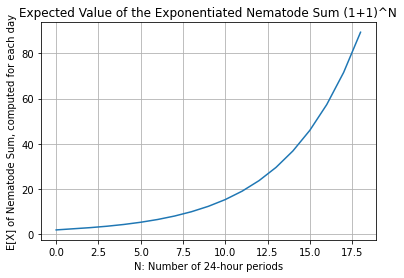

In [10]:
#And to construct an elaborate graph with the help of https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

fig, ax = plt.subplots()

ax.plot(indices, growth)

ax.set(xlabel='N: Number of 24-hour periods', ylabel='E[X] of Nematode Sum, computed for each day',
       title='Expected Value of the Exponentiated Nematode Sum (1+1)^N')
ax.grid()

fig.savefig("nematodesum.png")
plt.show()